In [18]:
import pandas as pd

df_train = pd.read_csv("../dataset/sts-indonesia/train.tsv", sep="\t")
df_train = df_train[["text1_id", "text2_id", "score"]]
df_train["score"] = df_train["score"] / 5.0
df_train

df_test = pd.read_csv("../dataset/sts-indonesia/test.tsv", sep="\t")
df_test = df_test[["text1_id", "text2_id", "score"]]
df_test["score"] = df_test["score"] / 5.0
df_test

df = pd.concat([df_train, df_test])
df

,text1_id,text2_id,score
0,Sebuah sepeda motor diparkir di dekat dinding ...,Sebuah sepeda motor diparkir oleh mural sebuah...,0.68
1,"dia menikahimu, memilih untuk memiliki anak be...",mereka tidak pernah mengangkat masalah moral a...,0.10
2,Wanita yang meninggal itu juga mengenakan cinc...,Seorang wanita berambut pirang mengenakan arlo...,0.52
3,Kedua komponen harus berada di jalur tertutup.,bohlam dan baterai berada di jalur tertutup,0.76
4,Seperti yang sudah saya jelaskan pada bacaan k...,Seperti yang telah saya katakan dalam bacaan k...,0.95
...,...,...,...
2575,PM Turki mendesak untuk mengakhiri protes di I...,Polisi Turki menembakkan gas air mata ke pengu...,0.56
2576,Karena tegangannya tidak mencapai bohlam.,jalannya tidak tertutup,0.36
2577,Mereka kemudian jatuh dan telah mendukung sera...,"Kedua negara yang menginvasi kemudian jatuh, d...",0.70
2578,Lem underlayment ke beton: berapa lama waktu y...,Berapa lama waktu yang dibutuhkan untuk menyem...,0.60


# Inference to all of the dataset

In [5]:
from sentence_transformers import SentenceTransformer, util

def find_similarity(model: SentenceTransformer, sentence1: str, sentence2: str) -> float:
    embeddings1 = model.encode(sentence1, convert_to_tensor=True)
    embeddings2 = model.encode(sentence2, convert_to_tensor=True)

    cosine_scores = util.cos_sim(embeddings1, embeddings2)
    return float(cosine_scores[0][0])

model = SentenceTransformer("../model/indobert-base-uncased-dense")
score_inference = []
for index, row in df.iterrows():
    row_score = find_similarity(model, sentence1=row["text1_id"], sentence2=row["text2_id"]) * 5
    score_inference.append(row_score)

df["score_inference"] = score_inference
df

/opt/homebrew/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,text1_id,text2_id,score,score_inference
0,Sebuah sepeda motor diparkir di dekat dinding ...,Sebuah sepeda motor diparkir oleh mural sebuah...,0.68,2.925211
1,"dia menikahimu, memilih untuk memiliki anak be...",mereka tidak pernah mengangkat masalah moral a...,0.10,1.025112
2,Wanita yang meninggal itu juga mengenakan cinc...,Seorang wanita berambut pirang mengenakan arlo...,0.52,3.448423
3,Kedua komponen harus berada di jalur tertutup.,bohlam dan baterai berada di jalur tertutup,0.76,3.087626
4,Seperti yang sudah saya jelaskan pada bacaan k...,Seperti yang telah saya katakan dalam bacaan k...,0.95,4.671894
...,...,...,...,...
2575,PM Turki mendesak untuk mengakhiri protes di I...,Polisi Turki menembakkan gas air mata ke pengu...,0.56,2.429301
2576,Karena tegangannya tidak mencapai bohlam.,jalannya tidak tertutup,0.36,1.926427
2577,Mereka kemudian jatuh dan telah mendukung sera...,"Kedua negara yang menginvasi kemudian jatuh, d...",0.70,2.166037
2578,Lem underlayment ke beton: berapa lama waktu y...,Berapa lama waktu yang dibutuhkan untuk menyem...,0.60,3.390761


In [7]:
df[(abs(df.score - df.score_inference)) < 0.5]

,text1_id,text2_id,score,score_inference
9,"Orang-orang bersenjata membunuh satu tentara, ...",Sejumlah pria bersenjata membunuh 6 pekerja po...,0.40,0.514332
18,Dua tewas dalam kekerasan Suriah setelah PBB m...,Larangan doping dua tahun untuk Contador,0.00,0.155852
30,Pertukaran tablet senjata Meksiko ...,Video menunjukkan puing-puing helikopter yang ...,0.00,-0.140918
32,Pemboman kembar di Pakistan menewaskan sedikit...,"Sekarang, militan memerangi polisi Pakistan",0.24,0.524773
100,Saya merasa sulit untuk menandai hanya satu ja...,Saya merekomendasikan &quot;Monyet Rumput&quot...,0.00,0.249585
...,...,...,...,...
2434,"orang-orang yang miskin, tanpa harta benda dasar",dua orang yang menikah satu sama lain.,0.00,0.253986
2444,Dua lelaki berdiri di rumput menatap mobil.,Seorang wanita berbaju merah muda berpose deng...,0.04,0.022094
2489,Gas signifikan pertama ditemukan di lepas pant...,Perampok membunuh 38 dalam bentrokan tanah ter...,0.16,0.242762
2531,Sekelompok orang menembakkan balon udara panas.,Sekelompok besar orang menunggang kuda coklat ...,0.00,0.273116


In [10]:
df[(abs(df.score - df.score_inference)) < 3]

,text1_id,text2_id,score,score_inference
0,Sebuah sepeda motor diparkir di dekat dinding ...,Sebuah sepeda motor diparkir oleh mural sebuah...,0.68,2.925211
1,"dia menikahimu, memilih untuk memiliki anak be...",mereka tidak pernah mengangkat masalah moral a...,0.10,1.025112
2,Wanita yang meninggal itu juga mengenakan cinc...,Seorang wanita berambut pirang mengenakan arlo...,0.52,3.448423
3,Kedua komponen harus berada di jalur tertutup.,bohlam dan baterai berada di jalur tertutup,0.76,3.087626
6,bahwa media liberal sialan tidak pernah mengej...,Lagipula itulah kebebasan.,0.12,2.095940
...,...,...,...,...
2575,PM Turki mendesak untuk mengakhiri protes di I...,Polisi Turki menembakkan gas air mata ke pengu...,0.56,2.429301
2576,Karena tegangannya tidak mencapai bohlam.,jalannya tidak tertutup,0.36,1.926427
2577,Mereka kemudian jatuh dan telah mendukung sera...,"Kedua negara yang menginvasi kemudian jatuh, d...",0.70,2.166037
2578,Lem underlayment ke beton: berapa lama waktu y...,Berapa lama waktu yang dibutuhkan untuk menyem...,0.60,3.390761


array([[<AxesSubplot: title={'center': 'score'}>,
        <AxesSubplot: title={'center': 'score_inference'}>]], dtype=object)

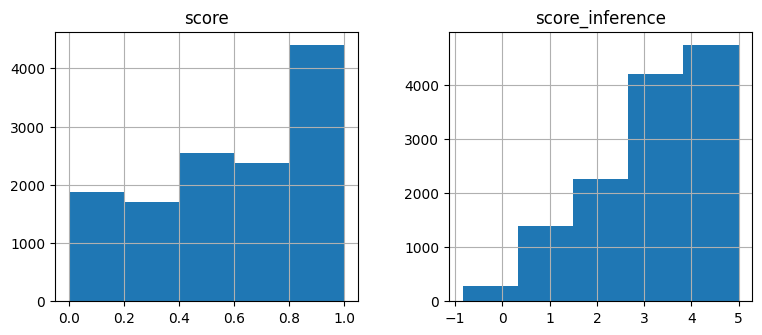

In [14]:
df.hist(column=["score", "score_inference"], bins=5, figsize=(9,3.5))

# Inference the test dataset

In [11]:
from sentence_transformers import SentenceTransformer, util

def find_similarity(model: SentenceTransformer, sentence1: str, sentence2: str) -> float:
    embeddings1 = model.encode(sentence1, convert_to_tensor=True)
    embeddings2 = model.encode(sentence2, convert_to_tensor=True)

    cosine_scores = util.cos_sim(embeddings1, embeddings2)
    return float(cosine_scores[0][0])

model = SentenceTransformer("../model/indobert-base-uncased-dense")
score_inference = []
for index, row in df_test.iterrows():
    row_score = find_similarity(model, sentence1=row["text1_id"], sentence2=row["text2_id"]) * 5
    score_inference.append(row_score)

df_test["score_inference"] = score_inference
df_test

,text1_id,text2_id,score,score_inference
0,Partai oposisi Thailand memboikot pemilihan umum,Oposisi Thailand mengumumkan boikot pemilu,0.96,4.172984
1,"WHO mengatakan, kasus terbaru tidak sesuai den...",WHO mengatakan kasus Singapura tidak sesuai de...,0.76,4.335737
2,"Banyak orang yang mengikuti balap sepeda, term...",Seorang lelaki mengendarai kursi roda tiga.,0.52,2.825993
3,Jeff Bezos bertaruh $ 250 Juta untuk Menghidup...,Jeff Bezos Membayar $ 250 Juta Untuk The Washi...,0.84,4.445740
4,perbatasan atau batas suatu objek,"merencanakan, mengatur, dan melaksanakan (suat...",0.00,1.592918
...,...,...,...,...
2575,PM Turki mendesak untuk mengakhiri protes di I...,Polisi Turki menembakkan gas air mata ke pengu...,0.56,2.429301
2576,Karena tegangannya tidak mencapai bohlam.,jalannya tidak tertutup,0.36,1.926427
2577,Mereka kemudian jatuh dan telah mendukung sera...,"Kedua negara yang menginvasi kemudian jatuh, d...",0.70,2.166037
2578,Lem underlayment ke beton: berapa lama waktu y...,Berapa lama waktu yang dibutuhkan untuk menyem...,0.60,3.390761


array([[<AxesSubplot: title={'center': 'score'}>,
        <AxesSubplot: title={'center': 'score_inference'}>]], dtype=object)

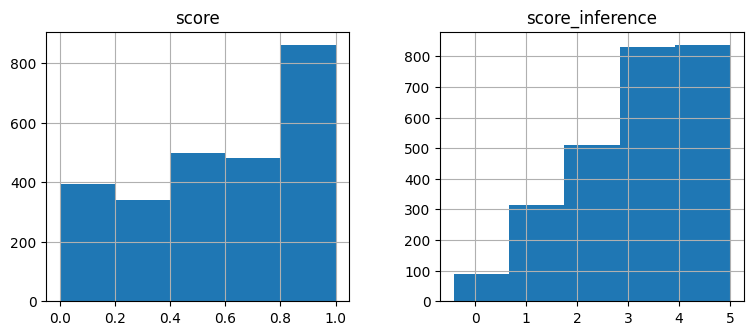

In [15]:
df_test.hist(column=["score", "score_inference"], bins=5, figsize=(9,3.5))

In [17]:
df[df.score_inference < 0]

,text1_id,text2_id,score,score_inference
30,Pertukaran tablet senjata Meksiko ...,Video menunjukkan puing-puing helikopter yang ...,0.00,-0.140918
141,Dia kemudian berkata dia tidak bisa memberi sa...,jika itu bukan buatan manusia aku belum pernah...,0.00,-0.121386
219,Dua lelaki di sisi tongkang,Seorang pria sedang berbaring rumput dengan ra...,0.00,-0.166773
328,"Sebuah lubang hitam (singkat), tidak lebih dar...","Saya pikir Anda bermaksud bertanya, &quot;Apa ...",0.00,-0.365109
594,tindakan menyembunyikan atau menyamar,tindakan memberikan subsidi.,0.00,-0.003251
...,...,...,...,...
1134,Kursi hitam dan putih duduk di depan dinding b...,Seekor domba hitam berkepala wol tebal berdiri...,0.12,-0.254059
1158,"Karena kau agak kabur di sini, aku hanya bisa ...","Secara umum, menghangatkan otot Anda hanya mem...",0.00,-0.113118
1639,tindakan memberikan bantuan atau bantuan kepad...,tindakan menerapkan cat ke permukaan.,0.04,-0.247921
1739,menyadari dan menyesali tidak adanya sesuatu a...,pengekangan yang memeriksa gerakan sesuatu.,0.00,-0.028781


# Inference the dataset using EmbeddingSimilarityEvaluator

In [21]:
model = SentenceTransformer("../model/indobert-base-uncased-dense")

In [35]:
from sklearn.metrics.pairwise import paired_cosine_distances

sentences1 = df.text1_id.to_list()
sentences2 = df.text2_id.to_list()

embeddings1 = model.encode(sentences1, convert_to_numpy=True)
embeddings2 = model.encode(sentences2, convert_to_numpy=True)

cosine_scores = 1 - (paired_cosine_distances(embeddings1, embeddings2))


In [44]:
score_inference = cosine_scores.tolist()
df["score_inference"] = score_inference
df

,text1_id,text2_id,score,score_inference
0,Sebuah sepeda motor diparkir di dekat dinding ...,Sebuah sepeda motor diparkir oleh mural sebuah...,0.68,0.585042
1,"dia menikahimu, memilih untuk memiliki anak be...",mereka tidak pernah mengangkat masalah moral a...,0.10,0.205022
2,Wanita yang meninggal itu juga mengenakan cinc...,Seorang wanita berambut pirang mengenakan arlo...,0.52,0.689685
3,Kedua komponen harus berada di jalur tertutup.,bohlam dan baterai berada di jalur tertutup,0.76,0.617525
4,Seperti yang sudah saya jelaskan pada bacaan k...,Seperti yang telah saya katakan dalam bacaan k...,0.95,0.934379
...,...,...,...,...
2575,PM Turki mendesak untuk mengakhiri protes di I...,Polisi Turki menembakkan gas air mata ke pengu...,0.56,0.485860
2576,Karena tegangannya tidak mencapai bohlam.,jalannya tidak tertutup,0.36,0.385285
2577,Mereka kemudian jatuh dan telah mendukung sera...,"Kedua negara yang menginvasi kemudian jatuh, d...",0.70,0.433207
2578,Lem underlayment ke beton: berapa lama waktu y...,Berapa lama waktu yang dibutuhkan untuk menyem...,0.60,0.678152


,text1_id,text2_id,score,score_inference
